In [17]:
import numpy  as np
import matplotlib.pyplot as plt

In [18]:
def bracket_livro(x, y, flag=False, l_r=None, x1=None, x2=None):

    # Iniciar coordenadas caso não sejão específicadas 
    if x1==None:
        x1 = x[0]
    if x2==None:
        x2 = x[-1]

    # Iniciar o parâmetro condizente ao tamanho do passo
    if l_r == None:
        l_r = 0.0001

    if y(x1) > y(x2):
        x1 = x2

    # Variável auxiliar 
    xx2 = x2
    while True:
        # Executando os passos
        xx2 = xx2 - (abs(xx2*l_r) + 0.00001)

        ''' Se o passo atual resulta em uma função 
        maior que a anterior a otimização é encerrada'''
        if y(x2) <= y(xx2):
            if flag:
                x2 = xx2

            # Case para retornar a sequencia menor para maior
            if x1 > x2:
         
                return x2, x1

            return x1, x2
        
        x2 = xx2

In [19]:
'''Modificação do algoritmo bracket apresentado no livro, nesse
tentamos melhor o intervalo em ambos os lados, coisa que não ocorre
no do livro'''
def bracket_mod1(x, y):

    xx1, xx2 = bracket_livro(x, y)
    return bracket_livro(x, y, True, x1=xx1, x2=xx2)

In [20]:
def x_squared(x):
    return x**2

def x_squared1(x):
    return (x+6)**2

x = np.linspace(-15, 5, 10000)

In [21]:
bracket = bracket_livro(x, x_squared1)
bracket_mod = bracket_mod1(x, x_squared1)
print("Bracket: ", bracket)
print("Bracket_mod: ", bracket_mod)

Bracket:  (-15.0, -5.9999485154583265)
Bracket_mod:  (-6.000558510309872, -5.9999485154583265)


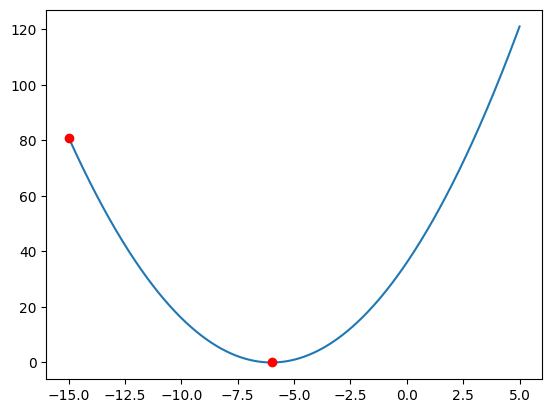

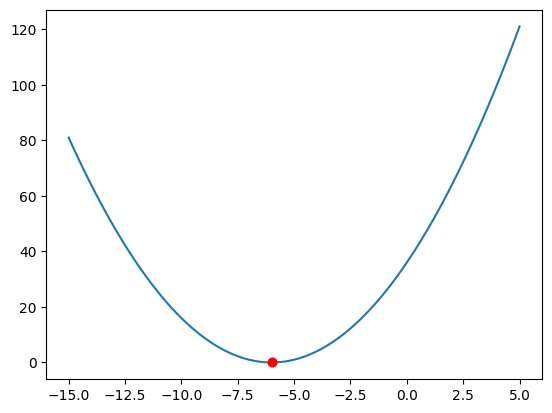

In [39]:
sub = plt.subplot(111)
sub.plot(x, x_squared1(x))
sub.plot(bracket[0], x_squared1(bracket[0]), "or")
sub.plot(bracket[1], x_squared1(bracket[1]), "or")
plt.show()

sub1 = plt.subplot(111)
sub1.plot(x, x_squared1(x))
sub1.plot(bracket_mod[0], x_squared1(bracket_mod[0]), "or")
sub1.plot(bracket_mod[1], x_squared1(bracket_mod[1]), "or")
plt.show()

In [ ]:
# Função que retorna o valor fibonacci da posição n
def fibonacci(n):
    fn = [0, 1,]
    for i in range(2, n+1):
        fn.append(fn[i-1] + fn[i-2])
    return fn

In [ ]:
'''Será sempre a partir do inicio  usado uma razão dos valores fibonacci para criar
c1 e d1, sempre d1 > c1. Basicamente o loop irá encolher o intervalo inicial (xl, xr)
dependendo nos valores de f(d1) e f(c1), esse loop ocorrendo até n ou a parada com intervalo
xr - xl < 0.1 (essa precisou ser adicionada pois na medida que o intervalo ficava muito 1*10^-6
ocorriam problemas) '''

def fib_search(f, n, xl, xr):
    F = fibonacci(n) 

    intervalo = xr - xl
    c1 = xl + F[n-2]/F[n]*intervalo
    d1 = xl + F[n-1]/F[n]*intervalo
    n-=1
    while(n>2):
       
        if(f(c1) > f(d1)):
            xl = c1
            intervalo = xr - xl
            c1 = xl + F[n-2]/F[n]*intervalo
            d1 = xl + F[n-1]/F[n]*intervalo

        else:
            xr = d1
            intervalo = xr - xl
            c1 = xl + F[n-2]/F[n]*intervalo
            d1 = xl + F[n-1]/F[n]*intervalo

        if intervalo < 0.01:
            return [xl, xr]

        n-=1

    return [xl, xr]